In [1]:
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
windows = [30,60,90,120]
quantiles = [0.25, 0.75]

max_ = []
min_ = []
top_q = []
bottom_q = []
median = []
realized = []

In [3]:
data = yfin.download("NVDA", start="2021-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
def get_realized_volatility(price_data, window=20):
    log_return = (price_data['Close']/price_data["Close"].shift(1)).apply(np.log)
    
    return log_return.rolling(window=window, center=False).std()*math.sqrt(252)

In [5]:
def plot_cones():
    for window in windows:
        estimator = get_realized_volatility(data, window)
        max_.append(estimator.max())
        min_.append(estimator.min())
        top_q.append(estimator.quantile(quantiles[1]))
        bottom_q.append(estimator.quantile(quantiles[0]))
        median.append(estimator.median())
        realized.append(estimator[-1])
        
    plt.plot(windows, max_, "-o", linewidth=1, label="Max")
    plt.plot(windows, min_, "-o", linewidth=1, label="Min")
    plt.plot(windows, median, "-o", linewidth=1, label="Median")
    plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1]*100:.0f} Percentile")
    plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0]*100:.0f} Percentile")
    
    plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")
    plt.xticks(windows)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.show()

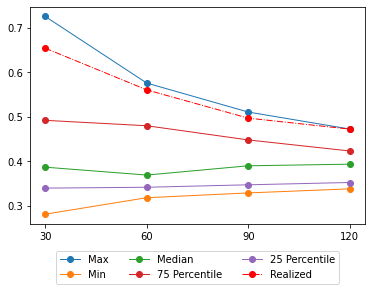

In [6]:
plot_cones()